In [1]:
from numpy.random import uniform, randint
from math import sqrt, pi
import cmath 
from collections import namedtuple
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# Parameters

In [2]:
N = 64 # approximate number of disks 
η =  0.75 # density
r = sqrt(η / (N * pi)) # radius 
ε = 0.2 * r # shift

# Initial configuration

In [3]:
Point = namedtuple('Point', 'x y')

In [4]:
def init_centers_honeycomb():
    centers = []
    k = int(sqrt(2.0 * N / sqrt(3.0)))
    l = int(k * sqrt(3.0) / 2.0 + 0.5)
    for i in range(k):
        for j in range(l):
            centers.append(Point((2.0 * i + 1.0)/(2.0 * k), (2.0 * j + 1.0 + (i % 2))/(2.0 * l)))    
    return centers

def init_centers_grid():
    centers = []
    N_sqrt = round(sqrt(N))
    for i in range(N_sqrt):
        for j in range(N_sqrt):
            centers.append(Point((2.0 * i) / (2.0 * N_sqrt), 2.0 * j / (2.0 * N_sqrt)))    
    return centers

def show_configuration(centers, r):
    fig = plt.figure(figsize=(6, 6))
    for i in range(len(centers)):
        center = centers[i]
        for ix in range(-1, 2):
            for iy in range(-1, 2):
                plt.gca().add_patch(plt.Circle((center.x + ix, center.y + iy), radius = r,  fc = 'r'))
    plt.axis('scaled')
    plt.axis([0.0, 1.0, 0.0, 1.0])

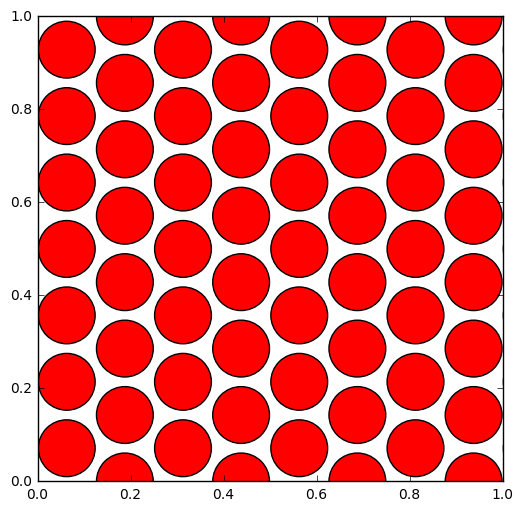

In [5]:
show_configuration(init_centers_honeycomb(), r)

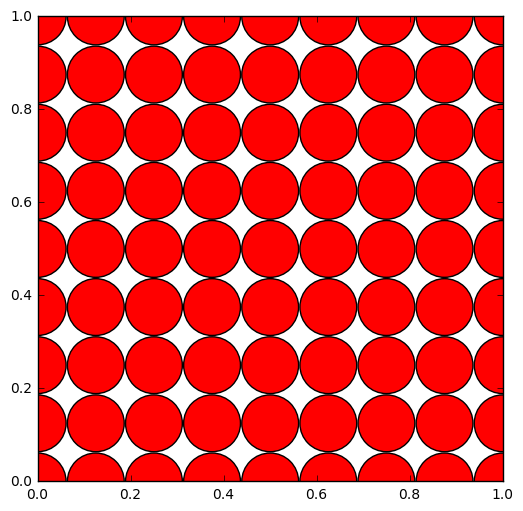

In [6]:
show_configuration(init_centers_grid(), r)

# MCMC Sampling

In [7]:
def dist(pt1, pt2): # on torus
    d_x = abs(pt1.x - pt2.x) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(pt1.y - pt2.y) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return  sqrt(d_x**2 + d_y**2)

## Psi_6 metrics 

In [8]:
def get_angle(pt1, pt2):
    dx = (pt1.x - pt2.x) % 1.0
    if dx > 0.5: 
        dx -= 1.0
    dy = (pt1.y - pt2.y) % 1.0
    if dy > 0.5: 
        dy -= 1.0
    return cmath.phase(complex(dx, dy))

def psi_6(centers, r):
    sum_vector = 0j
    for i in range(len(centers)):
        vector  = 0j
        n_neighbor = 0
        for j in range(len(centers)):
            if dist(centers[i], centers[j]) < 2 * sqrt(2) * r and i != j:
                n_neighbor += 1
                angle = get_angle(centers[i], centers[j])
                vector += abs(cmath.exp(6.0j * angle))
        if n_neighbor > 0: 
            vector /= n_neighbor
        sum_vector += vector
    return sum_vector / float(len(centers))

In [9]:
def move_center(cur_center, ε):
    return Point((cur_center.x + uniform(-ε, ε)) % 1.0, (cur_center.y + uniform(-ε, ε)) % 1.0)

def MCMC(n_steps):
    centers = init_centers_grid() 
    #centers = init_centers_honeycomb()
    for step in range(n_steps):
        rand_idx = randint(len(centers))
        cur_center = centers[rand_idx]
        new_center = move_center(cur_center, ε)      
        min_dist = min(dist(new_center, c) for c in centers if c != cur_center)
        if (min_dist >= 2.0 * r):
            centers[rand_idx] = new_center
    return centers

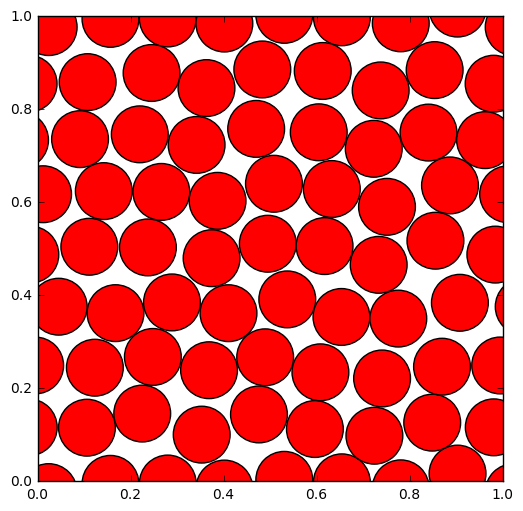

In [10]:
centers = MCMC(50000)
show_configuration(centers, r)